In [25]:
# Import the Pandas library
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Urban Heat Islands

This data tracks temperature measurements across different environments over time.

Here's a breakdown of what each column is showing:

- `timestamp`: This column provides the exact date and time, including the timezone offset (-05:00 indicating UTC-5, likely Central Daylight Time or Eastern Standard Time). The timestamps are recorded at one-minute intervals, indicating a detailed time-series observation of temperature changes.

- `urban_parking_lot_temperature`: This represents the temperature recorded in an urban parking lot. Parking lots, especially those made of asphalt or concrete, tend to absorb and retain a significant amount of solar radiation, often leading to higher temperatures compared to vegetated areas.

- `urban_park_temperature`: This indicates the temperature measured in an urban park. Parks, with their trees, grass, and open spaces, can help mitigate the urban heat island effect by providing shade and evapotranspiration, often resulting in cooler temperatures than surrounding built-up areas.

- `suburban_rural_temperature`: This column shows the temperature recorded in a suburban or rural area. These areas typically have more natural landscapes, less dense infrastructure, and more vegetation, which generally results in lower temperatures compared to dense urban environments.

In [31]:
heat = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/chicago-urban-heat-island.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timestamp                      2520 non-null   object 
 1   urban_parking_lot_temperature  2520 non-null   float64
 2   urban_park_temperature         2520 non-null   float64
 3   suburban_rural_temperature     2520 non-null   float64
dtypes: float64(3), object(1)
memory usage: 78.9+ KB


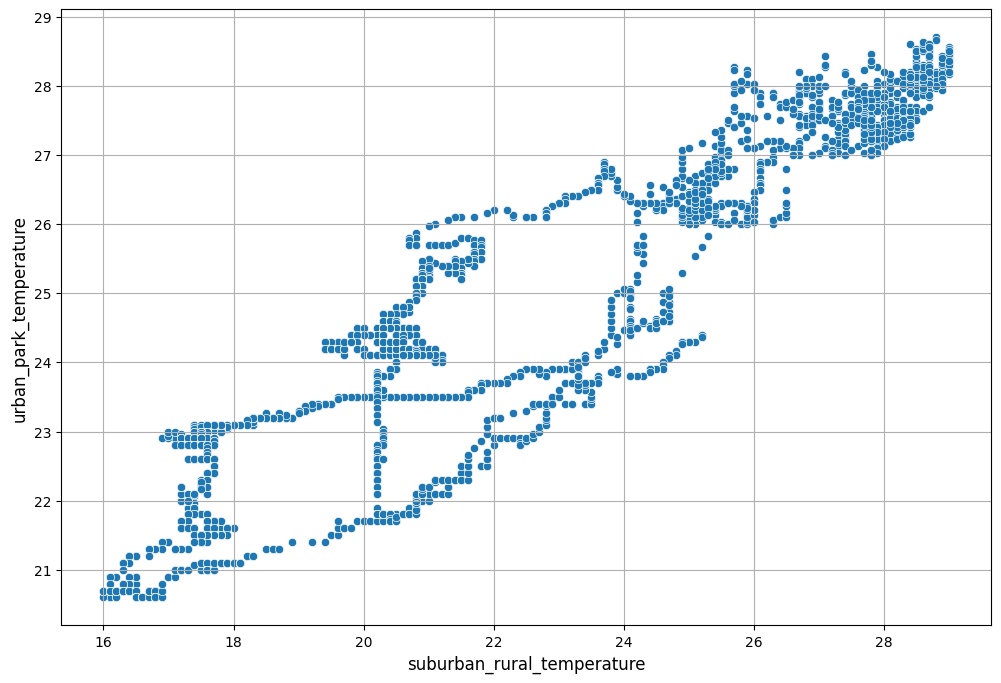

0.91


In [32]:
heat.info()
heat.head()

plt.figure(figsize = (12, 8))
sb.scatterplot(x = 'suburban_rural_temperature', y = 'urban_park_temperature', data = heat)
plt.xlabel('suburban_rural_temperature', fontsize = 12)
plt.ylabel('urban_park_temperature', fontsize =12)
plt.grid(True)
plt.show()

correlation = heat['suburban_rural_temperature'].corr(heat['urban_park_temperature'])
print(f"{correlation:.2f}")

# Electricity Grid Pricing

This data is real-time electricity market data from an Independent System Operator (ISO) or Regional Transmission Organization (RTO) called PJM Interconnection and the "PSEG" zone. This type of data is crucial for understanding the dynamics of electricity supply, demand, and grid conditions.

Here's a breakdown of what each column is showing:

- `datetime_beginning_utc`: This timestamp indicates the start time of the data record in Coordinated Universal Time (UTC). UTC is a global standard for time, which helps in synchronizing data from different regions.

- `datetime_beginning_ept`: This timestamp indicates the start time of the data record in Eastern Prevailing Time (EPT). EPT is the local time zone relevant to the electricity market operation (e.g., Eastern Time in the United States, which PJM Interconnection primarily operates in).

- `pnode_id`: This is a unique numerical identifier for a "Pricing Node" (PNode) within the electricity grid. A PNode is a specific location (e.g., a substation, generator, or load point) where electricity prices are calculated.

- `pnode_name`: This provides the human-readable name of the Pricing Node, making it easier to identify the specific location on the grid.

- `voltage`: This indicates the voltage level at the pricing node (e.g., 230 KV). Voltage levels are important for understanding the transmission network's capacity and characteristics.

- `zone`: This specifies the transmission zone or geographic region where the pricing node is located. "PSEG" refers to Public Service Enterprise Group, a utility operating within a larger electricity market's zone.

- `system_energy_price_rt`: This is the real-time system-wide energy price. It represents the base cost of electricity itself, before accounting for any transmission constraints or losses.

- `total_lmp_rt`: This stands for "Total Locational Marginal Price (Real-Time)." LMP is the price of electricity at a specific pricing node, reflecting not only the cost of energy but also the costs associated with transmission congestion and marginal losses at that location. It's the key price signal in many wholesale electricity markets.

- `congestion_price_rt`: This is the real-time component of the LMP that accounts for transmission congestion. Congestion occurs when the demand for transmission capacity exceeds the available capacity on a particular transmission line, leading to higher prices at certain locations. A negative value, indicates that the flow on a congested line is being reversed, which can lower prices at that node.

- `marginal_loss_price_rt`: This is the real-time component of the LMP that accounts for the cost of electricity lost during transmission. As electricity travels through power lines, some energy is dissipated as heat. This component reflects the cost of covering those losses at the margin.

In [34]:
elec_grid_7_15 = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/electric%20grid/electric_grid_7_15_2024.csv')

In [ ]:
elec_grid_8_7 = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/electric%20grid/electric_grid_8_7_2024.csv')

In [35]:
elec_grid_11_20 = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/electric%20grid/electric_grid_11_20_2024.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264744 entries, 0 to 264743
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime_beginning_utc  264744 non-null  object 
 1   datetime_beginning_ept  264744 non-null  object 
 2   pnode_id                264744 non-null  int64  
 3   pnode_name              264744 non-null  object 
 4   voltage                 264744 non-null  object 
 5   zone                    264744 non-null  object 
 6   system_energy_price_rt  264744 non-null  float64
 7   total_lmp_rt            264744 non-null  float64
 8   congestion_price_rt     264744 non-null  float64
 9   marginal_loss_price_rt  264744 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 20.2+ MB


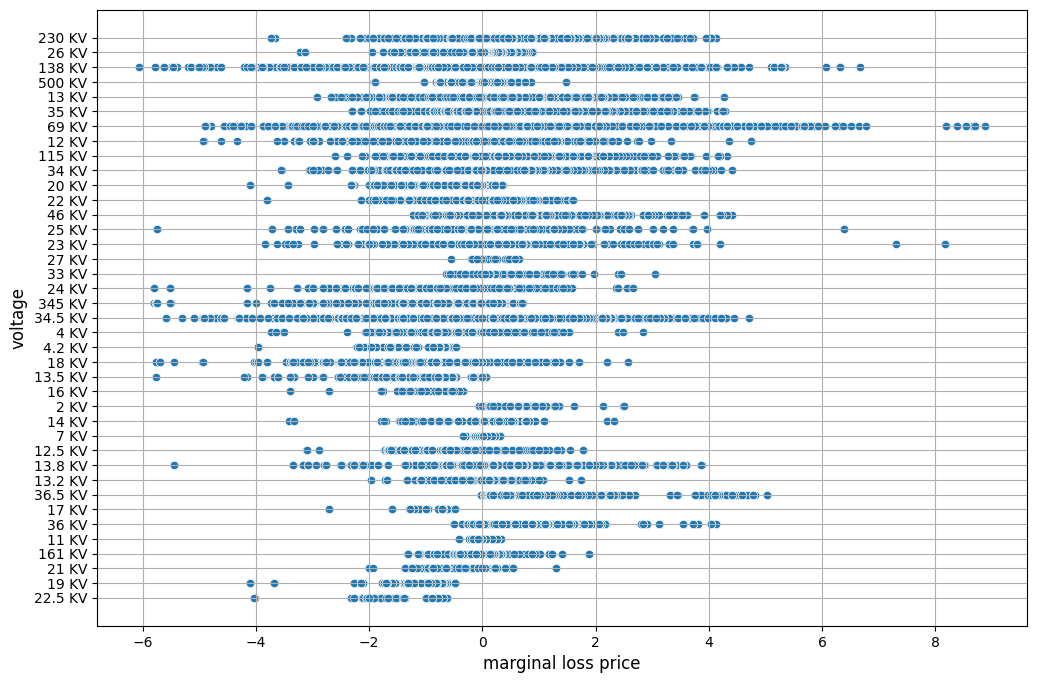

KeyError: 'marginal_loss_price_rt'

In [39]:
elec_grid_11_20.info()
elec_grid_11_20.head()

plt.figure(figsize = (12, 8))
sb.scatterplot(y = 'voltage', x = 'marginal_loss_price_rt', data = elec_grid_11_20)
plt.ylabel('voltage', fontsize = 12)
plt.xlabel('marginal loss price', fontsize =12)
plt.grid(True)
plt.show()

correlation = elec_grid_11_20['voltage'].corr(heat['marginal_loss_price_rt'])
print(f"{correlation:.2f}")

# Smart Energy Plaza Solar

This data comes from a solar panel inverter at Argonne's Smart Energy Plaza, providing insights into the real-time performance of a photovoltaic (PV) system. An inverter's primary role is to convert the direct current (DC) electricity produced by solar panels into alternating current (AC) electricity suitable for grid consumption or household use.

Here's an explanation of each column:

- `datetimestamp`: This column records the exact date and time when the measurements were taken. It allows for tracking the solar panel system's operational parameters over time.

- `PhV` (Phase Voltage): This likely represents the Alternating Current (AC) voltage output by the inverter. Values around 237.2 V are typical for single-phase AC electricity supply in many residential or commercial settings (e.g., a nominal 240V system).

- `phA` (Phase Amperage): This denotes the Alternating Current (AC) flowing from the inverter. It indicates the amount of electrical current being supplied to the load or the grid.

- `StVA` (Apparent Power): Refers to "Apparent Power" in Volt-Amperes (VA). Apparent power is the product of voltage and current in an AC circuit, encompassing both real power (W) and reactive power. It gives a complete picture of the total electrical power in the circuit, regardless of its usability for work.

- `W` (Real Power): This represents the "Real Power" or active power, measured in Watts. This is the actual electrical power being produced by the inverter that can do useful work (e.g., power appliances, or be fed into the grid).

- `DCV` (DC Voltage): This is the Direct Current (DC) voltage measured on the input side of the inverter, directly from the solar panel array. It indicates the electrical potential supplied by the solar panels.

- `DCA` (DC Amperage): This is the Direct Current (DC) flowing from the solar panel array into the inverter. It represents the amount of current generated by the solar panels.

In [ ]:
smart_energy_plaza_solar = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/smart%20energy%20plaza/smart_energy_plaza_solar.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644292 entries, 0 to 644291
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datetimestamp  644292 non-null  object 
 1   PhVphA         644292 non-null  float64
 2   St             644292 non-null  float64
 3   VA             644292 non-null  float64
 4   W              644292 non-null  float64
 5   DCV            644292 non-null  float64
 6   DCA            644292 non-null  float64
dtypes: float64(6), object(1)
memory usage: 34.4+ MB


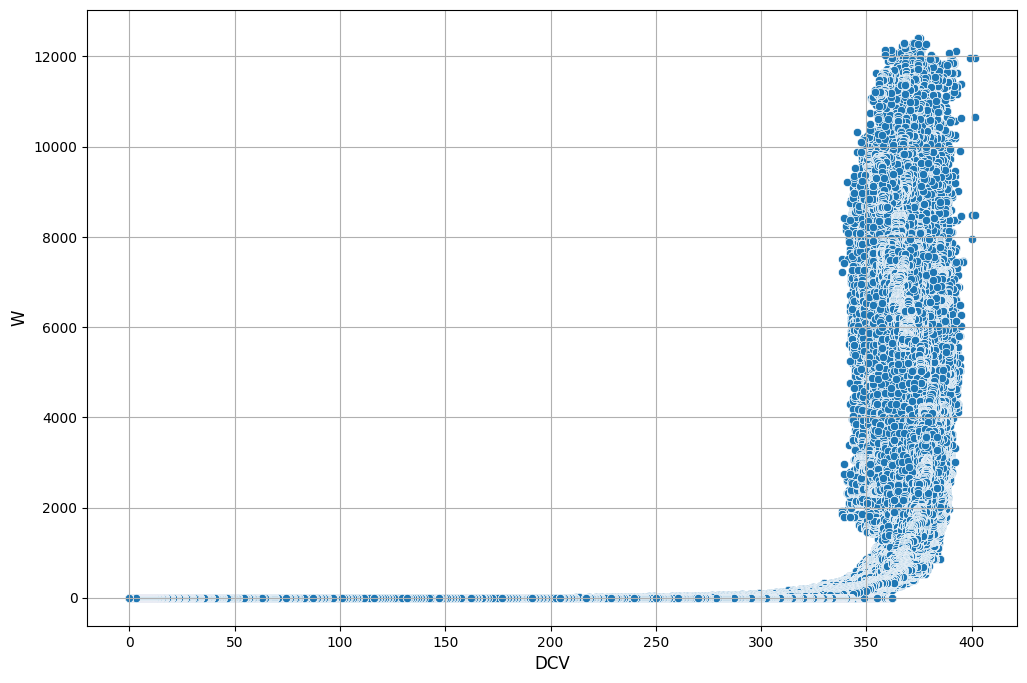

0.61


In [40]:
smart_energy_plaza_solar.info()
smart_energy_plaza_solar.head()

plt.figure(figsize = (12, 8))
sb.scatterplot(x = 'DCV', y = 'W', data = smart_energy_plaza_solar)
plt.xlabel('DCV', fontsize = 12)
plt.ylabel('W', fontsize =12)
plt.grid(True)
plt.show()

correlation = smart_energy_plaza_solar['DCV'].corr(smart_energy_plaza_solar['W'])
print(f"{correlation:.2f}")

# Battery Degradation

This data is a record of different mechanisms of capacity loss in a battery over time. Each column represents a specific aspect of degradation, and the values indicate the amount of capacity lost due to that mechanism.

Here's a breakdown of what each column is showing:

- `Time [s]`: This column represents the time elapsed in seconds. It allows you to track how the various capacity loss mechanisms evolve over the duration of the experiment or operation.

- `Loss of capacity to negative SEI [A.h]`: This indicates the capacity lost due to the formation of a Solid Electrolyte Interphase (SEI) layer on the negative electrode. The SEI layer is a passivation layer that forms on the electrode surface during the first charge, and its continued growth can consume active lithium ions, leading to capacity fade. The unit 'A.h' (Ampere-hour) quantifies the amount of electric charge, which directly relates to battery capacity.

- `Loss of capacity to positive SEI [A.h]`: Similar to the negative SEI, this column represents the capacity lost due to SEI formation on the positive electrode. While SEI formation is more commonly associated with the negative electrode, it can also occur on the positive electrode, contributing to capacity degradation.

- `Loss of capacity to positive SEI on cracks [A.h]`: This specifically measures the capacity loss due to SEI formation on cracks that may develop on the positive electrode. Cracks can expose new surfaces for SEI growth, accelerating capacity fade.

- `Loss of capacity to positive lithium plating [A.h]`: This column quantifies the capacity lost due to the undesirable process of lithium plating on the positive electrode. Lithium plating occurs when lithium ions deposit as metallic lithium on the electrode surface instead of intercalating into the electrode material, leading to irreversible capacity loss and potential safety issues.

In [ ]:
batteries = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/batteries/degradation_model_capacity_loss_200_cycles_sim3.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Time [s]                                            7591 non-null   float64
 1   Loss of capacity to negative SEI [A.h]              7591 non-null   float64
 2   Loss of capacity to positive SEI [A.h]              7591 non-null   float64
 3   Loss of capacity to positive SEI on cracks [A.h]    7591 non-null   float64
 4   Loss of capacity to positive lithium plating [A.h]  7591 non-null   float64
dtypes: float64(5)
memory usage: 296.7 KB


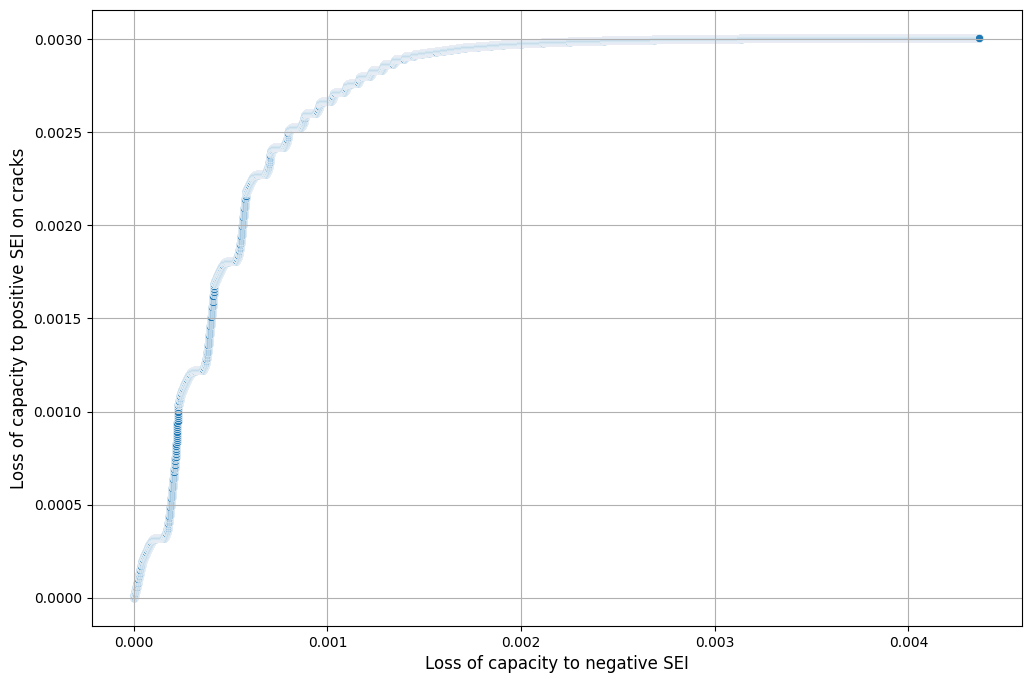

0.69


In [29]:
batteries.info()
batteries.head()

plt.figure(figsize = (12, 8))
sb.scatterplot(x = 'Loss of capacity to negative SEI [A.h]', y = 'Loss of capacity to positive SEI on cracks [A.h]', data = batteries)
plt.xlabel('Loss of capacity to negative SEI', fontsize = 12)
plt.ylabel('Loss of capacity to positive SEI on cracks', fontsize =12)
plt.grid(True)
plt.show()

correlation = batteries['Loss of capacity to negative SEI [A.h]'].corr(batteries['Loss of capacity to positive SEI on cracks [A.h]'])
print(f"{correlation:.2f}")